In [4]:
!pip install --upgrade pip
!pip install wordcloud plotly torch nltk pandas numpy matplotlib seaborn openpyxl scikit-learn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# NLP and Preprocessing
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from openpyxl import Workbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Transformer Libraries
!pip install transformers
!pip install torch
import torch
from torch import nn
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup


# 1. LOAD DATA

In [ ]:

df = pd.read_csv('Combined Data.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.columns = ['text', 'label']

# Check for null values or duplicates
df.dropna(inplace=True)
df.drop_duplicates(subset='text', inplace=True)
df.reset_index(drop=True, inplace=True)

print("Dataset sample:")
print(df.head())

Dataset sample:
                                                text    label
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety


In [8]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 103.4 MB/s eta 0:00:0000:0100:01


# 2. EXPLORATORY DATA ANALYSIS

In [10]:
# -- Class Distribution
label_counts = df['label'].value_counts()

# Bar Plot of Label Distribution (Times New Roman, bigger font)
plt.figure(figsize=(8,5), dpi=600)
plt.rcParams["font.family"] = "Times New Roman"
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Mental Health Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.title("Distribution of Mental Health Status", fontsize=16)
plt.tight_layout()
plt.savefig("label_distribution.png", dpi=600)
plt.close()

# -- Word Cloud
text_data = " ".join(df['text'].values)
wordcloud = WordCloud(width=800, height=600, 
                      stopwords=STOPWORDS, 
                      background_color="white").generate(text_data)
plt.figure(figsize=(8,5), dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Data", fontsize=16, fontname="Times New Roman")
plt.tight_layout()
plt.savefig("wordcloud.png", dpi=600)
plt.close()

# -- Sunburst Chart
fig_sunburst = px.sunburst(
    df, 
    path=['label'], 
    color='label',
    color_discrete_sequence=px.colors.qualitative.Prism,
    title='Sunburst Chart of Mental Health Status'
)
# Save static image
fig_sunburst.write_image("sunburst_chart.png", scale=3)  # scale=3 ~ 600dpi approximation
# Interactive display in notebook:
fig_sunburst.show()

# 3. DATA PREPROCESSING

In [11]:
! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
def expand_contractions(text):
    contractions_dict = {
        "don't": "do not", 
        "doesn't": "does not",
        "can't": "cannot",
        "i'm": "i am",
        "ain't": "is not",
        "n't": " not",
        "'re": " are",
        "'ll": " will",
        "'ve": " have",
        "'d": " would"
    }
    for contraction, expanded in contractions_dict.items():
        text = re.sub(contraction, expanded, text)
    return text

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Expand contractions
    text = expand_contractions(text)
    # Remove punctuation and symbols
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# Label Encoding
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['encoded_label'], random_state=42)
train_texts = train_df['clean_text'].tolist()
train_labels = train_df['encoded_label'].tolist()
test_texts = test_df['clean_text'].tolist()
test_labels = test_df['encoded_label'].tolist()

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

# 4. TRANSFORMER MODEL (BERT) PREPARATION

In [12]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)

def tokenize_function(texts, labels, max_length=128):
    encoding = tokenizer(texts, 
                         padding=True, 
                         truncation=True, 
                         max_length=max_length, 
                         return_tensors="pt")
    return encoding, torch.tensor(labels)

train_encodings, train_labels_t = tokenize_function(train_texts, train_labels)
test_encodings, test_labels_t = tokenize_function(test_texts, test_labels)

class MentalHealthDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    
    def __len__(self):
        return len(self.labels)

train_dataset = MentalHealthDataset(train_encodings, train_labels_t)
test_dataset = MentalHealthDataset(test_encodings, test_labels_t)

# Load pre-trained BERT For Sequence Classification (7 classes)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=7)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)




tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

# 5. TRAINING THE MODEL

In [13]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

# Hyperparameters
epochs = 10
learning_rate = 2e-5
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
loss_fn = nn.CrossEntropyLoss()

# Lists to store losses for each epoch
train_losses = []
val_losses = []

# Training loop with validation loss computation
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Compute validation loss
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()
    avg_val_loss = total_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)
    
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Epoch 1/10, Training Loss: 0.7141, Validation Loss: 0.5795
Epoch 2/10, Training Loss: 0.4874, Validation Loss: 0.5413
Epoch 3/10, Training Loss: 0.3577, Validation Loss: 0.5811
Epoch 4/10, Training Loss: 0.2465, Validation Loss: 0.6691
Epoch 5/10, Training Loss: 0.1551, Validation Loss: 0.7859
Epoch 6/10, Training Loss: 0.0942, Validation Loss: 0.8931
Epoch 7/10, Training Loss: 0.0568, Validation Loss: 1.0108
Epoch 8/10, Training Loss: 0.0363, Validation Loss: 1.0693
Epoch 9/10, Training Loss: 0.0241, Validation Loss: 1.1379
Epoch 10/10, Training Loss: 0.0155, Validation Loss: 1.1809


# 6. EVALUATION

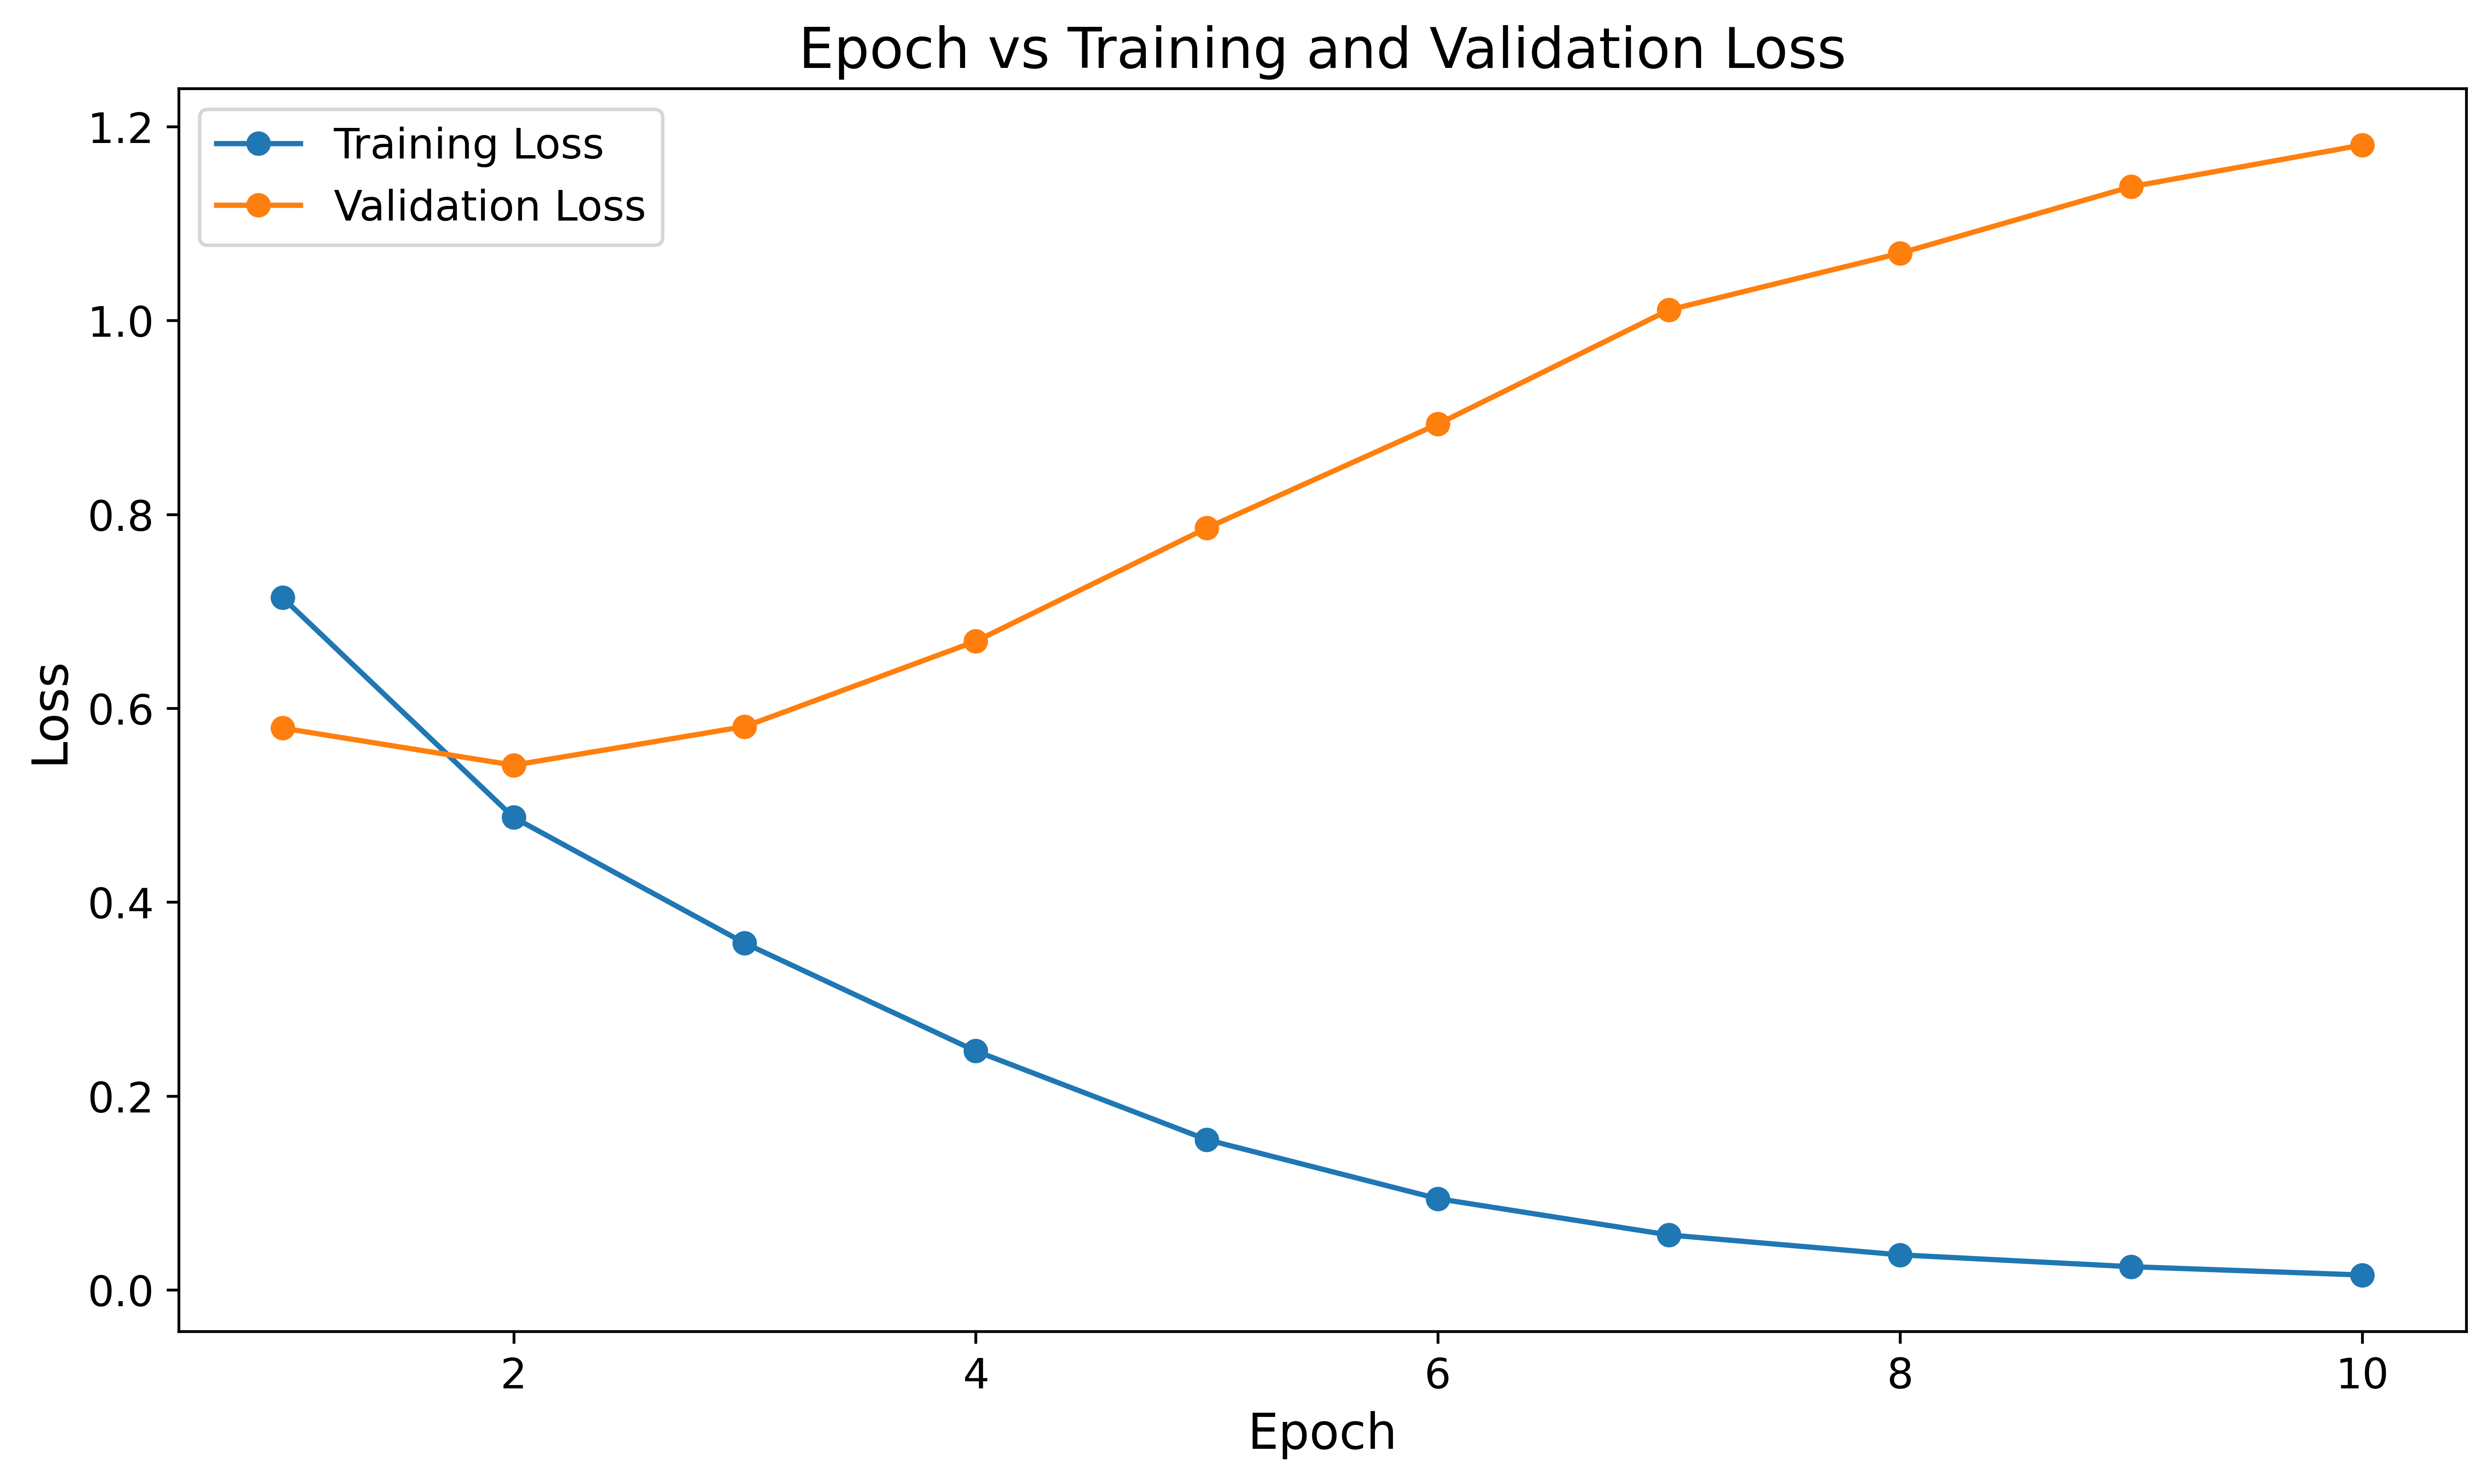

In [17]:
# Plot epoch vs training and validation loss (600 dpi)
epochs_range = range(1, epochs + 1)
plt.figure(figsize=(10, 6), dpi=600)
plt.plot(epochs_range, train_losses, label="Training Loss", marker='o')
plt.plot(epochs_range, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Epoch vs Training and Validation Loss", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("epoch_loss.png", dpi=600)
plt.show()
plt.close()

Classification Report:
                      precision    recall  f1-score       support
Anxiety                0.833787  0.846473  0.840082    723.000000
Bipolar                0.839207  0.762000  0.798742    500.000000
Depression             0.702951  0.733930  0.718107   3018.000000
Normal                 0.937851  0.936097  0.936973   3208.000000
Personality disorder   0.669014  0.530726  0.591900    179.000000
Stress                 0.598670  0.588235  0.593407    459.000000
Suicidal               0.664584  0.649906  0.657163   2128.000000
accuracy               0.779148  0.779148  0.779148      0.779148
macro avg              0.749438  0.721053  0.733768  10215.000000
weighted avg           0.779378  0.779148  0.778911  10215.000000
Accuracy: 0.7791


<Figure size 4800x3000 with 0 Axes>

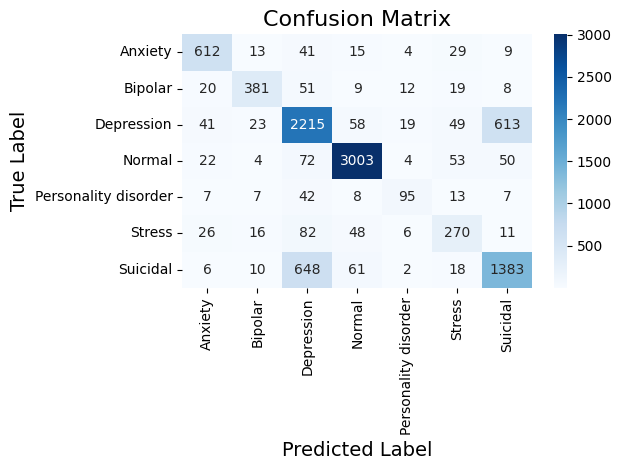

In [18]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Report
print("Classification Report:")
report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Save metrics to Excel
report_df.to_excel("classification_report.xlsx")

# Accuracy, Precision, Recall, F1 from the classification report
accuracy = report_df.loc["accuracy", "precision"]
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,5), dpi=600)
plt.show()
plt.rcParams["font.family"] = "Times New Roman"
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=600)
plt.show()
plt.close()

# 7. ROC-AUC (Multi-class)

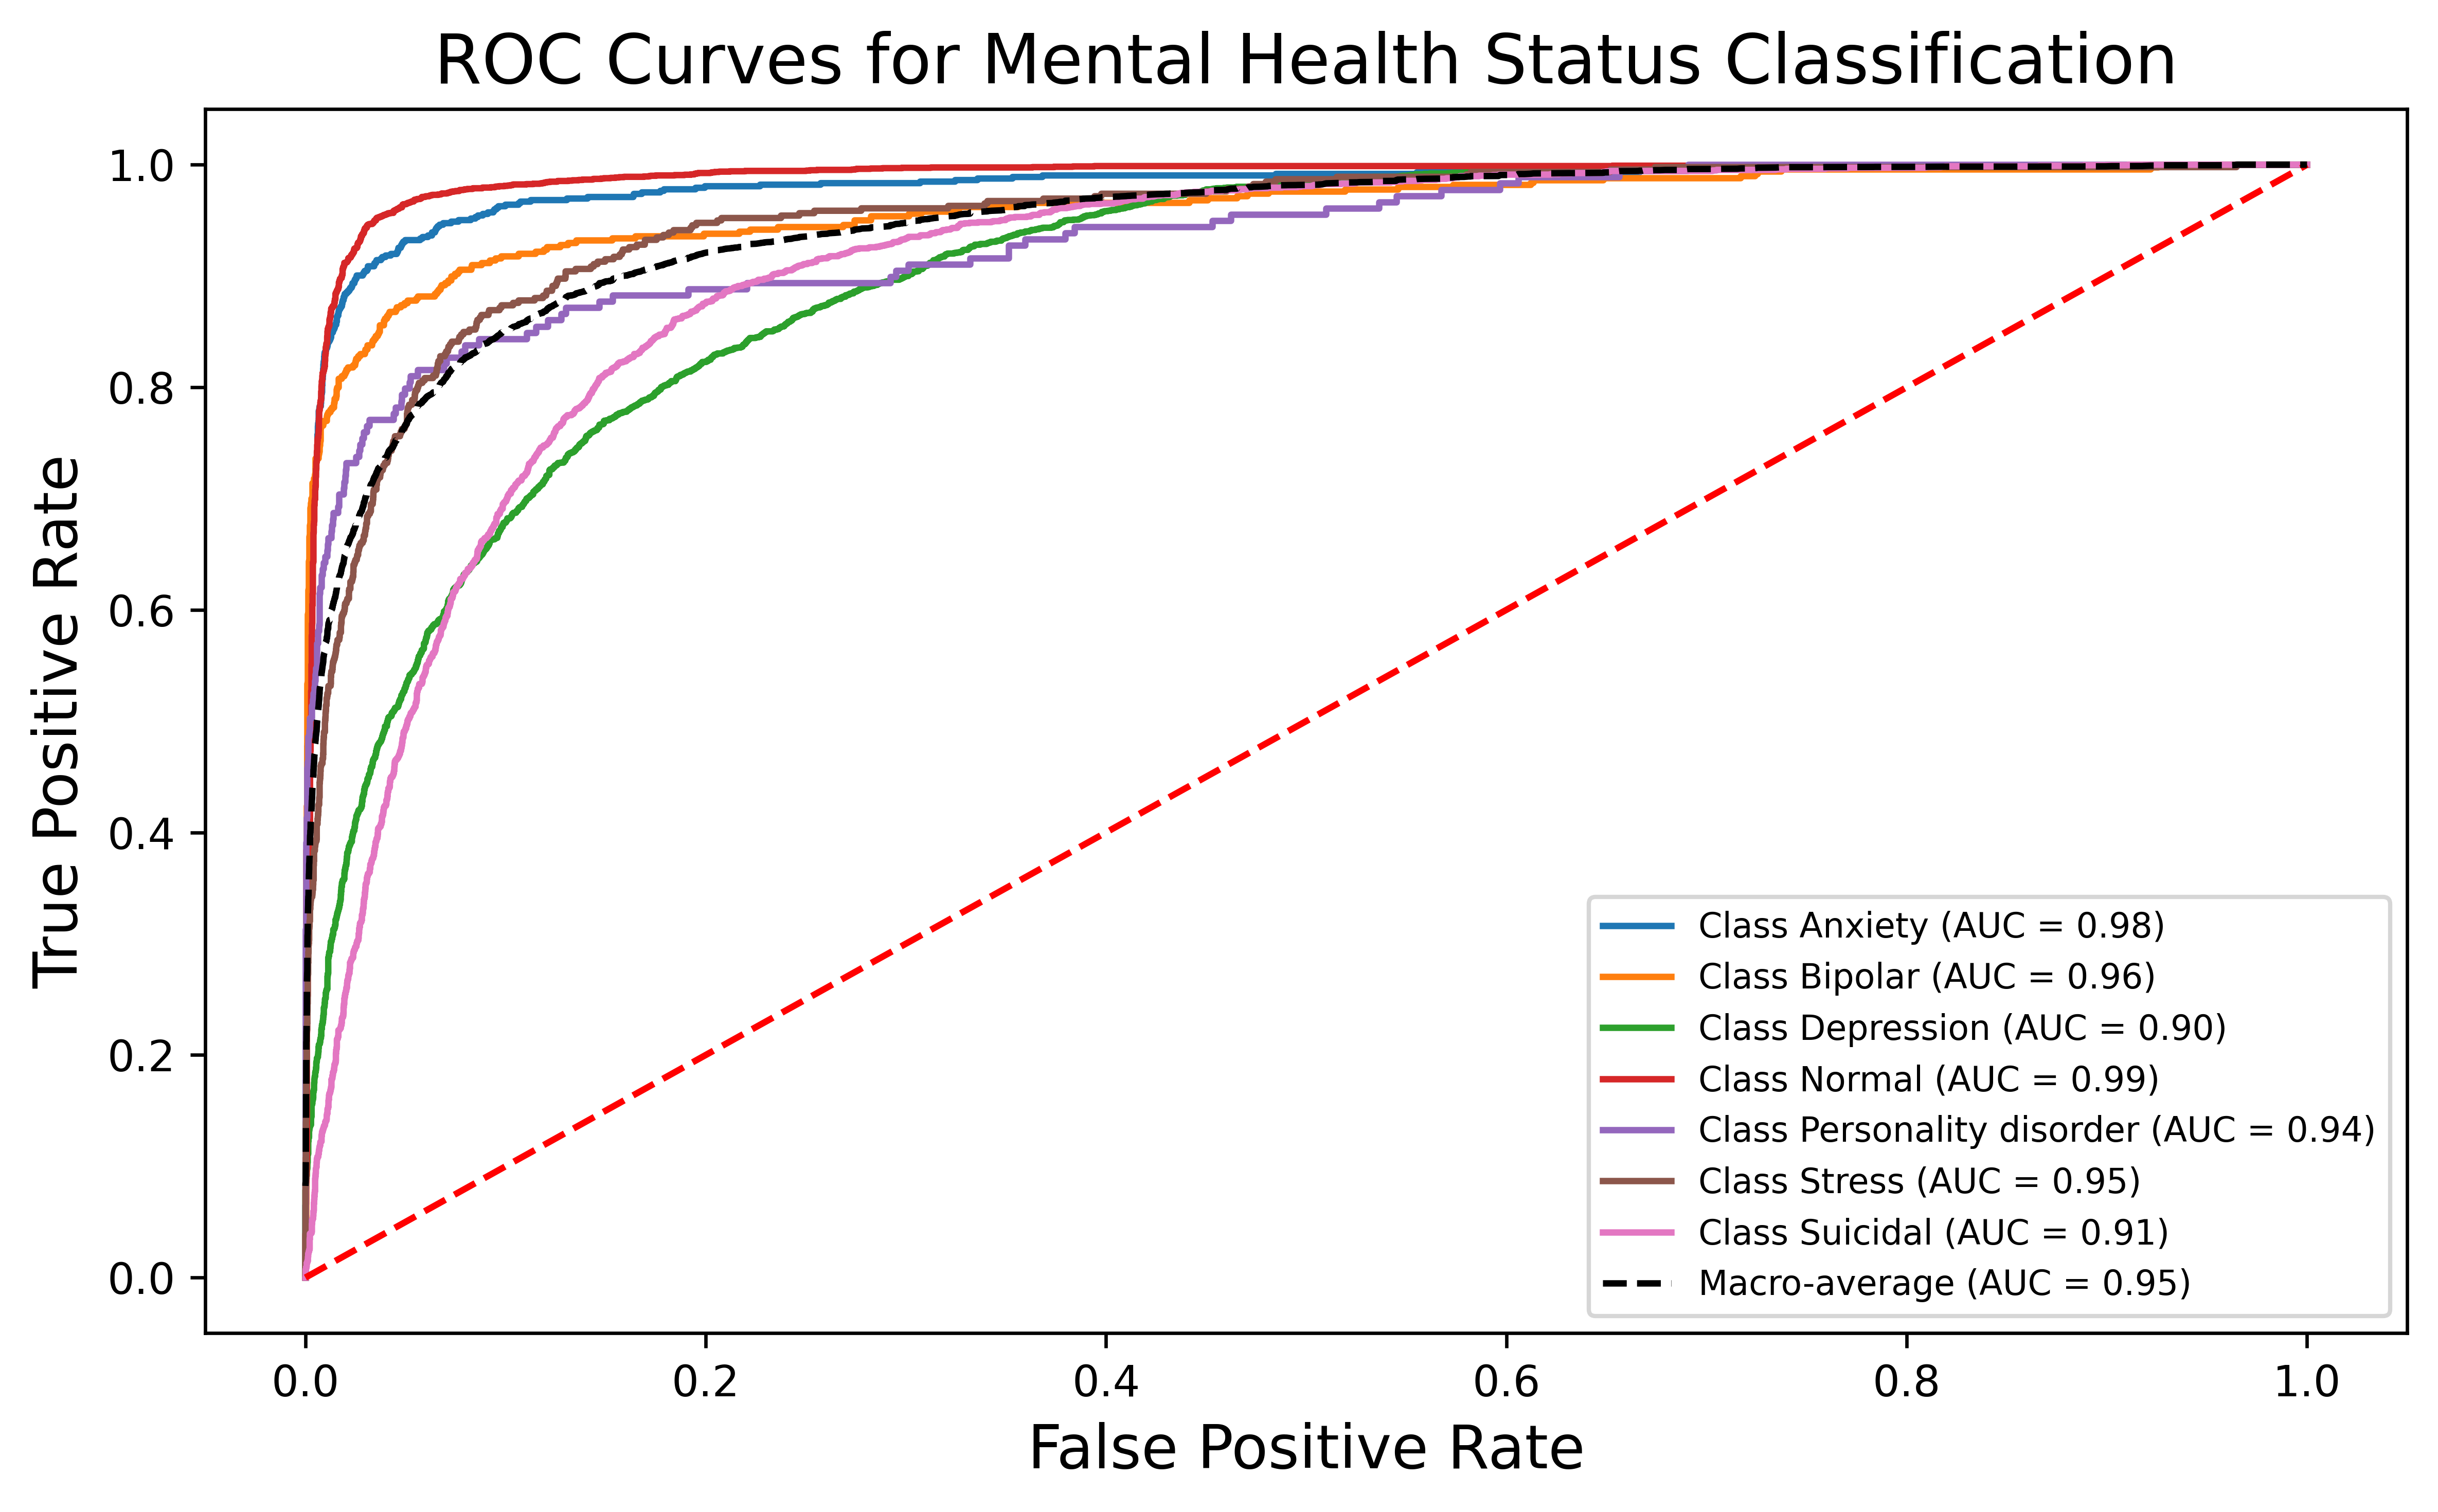

Training and evaluation complete. Plots and Excel file have been saved.


In [19]:
model.eval()
all_probs = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs.logits, dim=1)
        all_probs.extend(probs.cpu().numpy())

all_probs = np.array(all_probs)
# Compute one-vs-rest ROC-AUC for each class
y_true = np.array(all_labels)
y_score = all_probs

# Binarize labels
from sklearn.preprocessing import label_binarize
y_true_binarized = label_binarize(y_true, classes=range(len(label_encoder.classes_)))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_encoder.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Plot ROC
plt.figure(figsize=(8,5), dpi=600)
plt.rcParams["font.family"] = "Times New Roman"
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(all_fpr, mean_tpr, 'k--', label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})')
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curves for Mental Health Status Classification", fontsize=16)
plt.legend(loc="lower right", fontsize=8)
plt.tight_layout()
plt.savefig("roc_curves.png", dpi=600)
plt.show()
plt.close()

print("Training and evaluation complete. Plots and Excel file have been saved.")